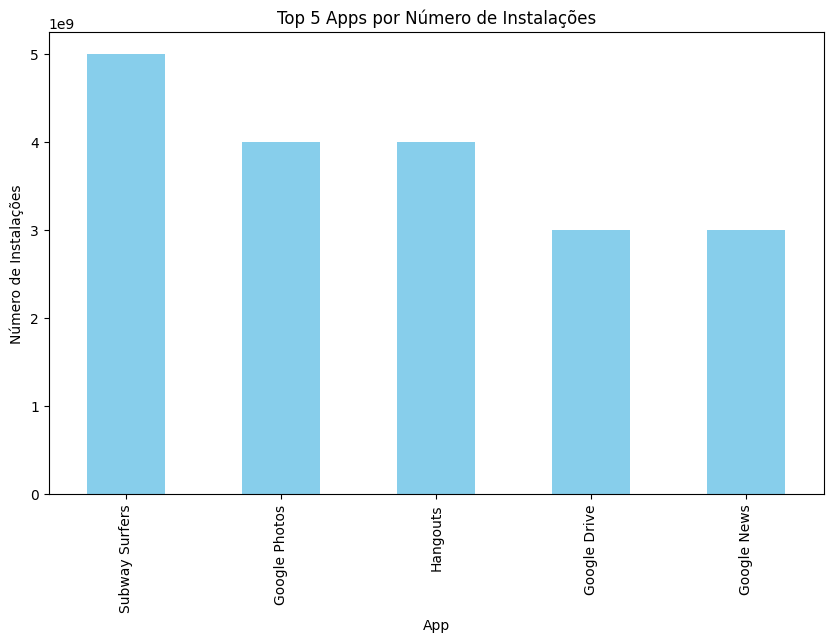

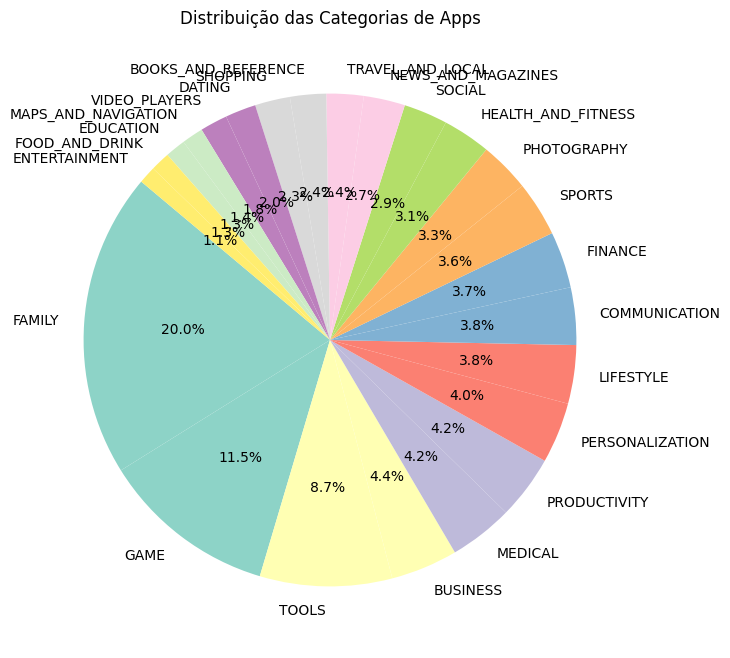

App mais caro: I'm Rich - Trump Edition | Preço: 400.0
----------------------------------------------------------------------------------
Número de apps classificados como 'Mature 17+': 447
----------------------------------------------------------------------------------
Top 10 apps por número de reviews:
                                                    App Reviews
2989                             GollerCepte Live Score    9992
4970                       Ad Block REMOVER - NEED ROOT     999
2705                                SnipSnap Coupon App    9975
3229                                         DreamTrips    9971
3049                  US Open Tennis Championships 2018    9971
7002   Adult Color by Number Book - Paint Mandala Pages     997
6724                     BSPlayer ARMv7 VFP CPU support    9966
7982  Easy Resume Builder, Resume help, Curriculum v...     996
353                                   MegaFon Dashboard   99559
326   Buff Thun - Daily Free Webtoon / Comics / Web 

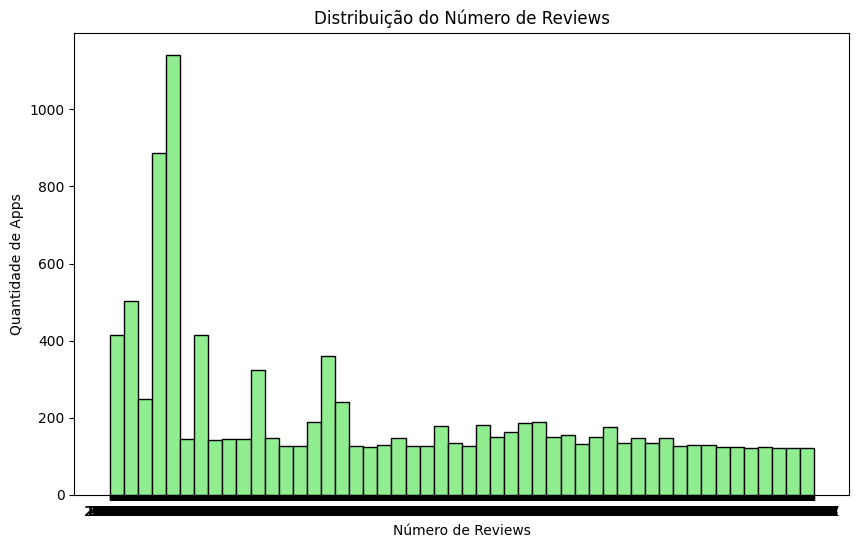

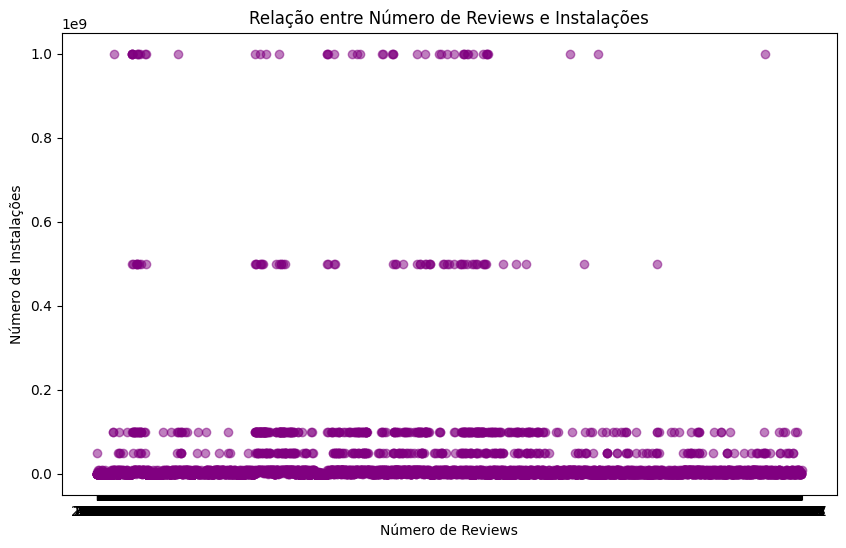

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv')

df = df.drop_duplicates()

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Free', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').dropna().astype(int)


top_5_installs = df.groupby('App')['Installs'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_installs.plot(kind='bar', color='skyblue')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.show()

category_counts = df['Category'].value_counts()

total_apps = df.shape[0]
category_counts = category_counts[category_counts / total_apps > 0.01]

# Gráfico de pizza mostrando categorias com mais de 1%
plt.figure(figsize=(10, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Distribuição das Categorias de Apps')
plt.ylabel('')
plt.show()

# App mais caro existente no dataset
df['Price'] = df['Price'].str.replace('$', '').replace('Everyone', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').dropna().astype(float)
most_expensive_app = df.loc[df['Price'].idxmax()]
print("App mais caro:", most_expensive_app['App'], "| Preço:", most_expensive_app['Price'])
print("----------------------------------------------------------------------------------")

# Contagem de apps classificados como 'Mature 17+'
mature_17_plus_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print("Número de apps classificados como 'Mature 17+':", mature_17_plus_count)
print("----------------------------------------------------------------------------------")

# Top 10 apps por número de reviews
top_10_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)
print("Top 10 apps por número de reviews:")
print(top_10_reviews)
print("----------------------------------------------------------------------------------")
# Histograma de avaliações
plt.figure(figsize=(10, 6))
plt.hist(df['Reviews'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribuição do Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Quantidade de Apps')
plt.show()

# Gráfico de dispersão (scatter plot) entre avaliações e instalações
plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], color='purple', alpha=0.5)
plt.title('Relação entre Número de Reviews e Instalações')
plt.xlabel('Número de Reviews')
plt.ylabel('Número de Instalações')
plt.show()
